In [1]:
# Tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)


# I/O libraries
import os
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

# Helper libraries
import matplotlib
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2 as cv
from tqdm import tqdm
import IPython
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

# Comment this out if you want to see Deprecation warnings
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

Instructions for updating:
non-resource variables are not supported in the long term
2.11.0


In [10]:
from CityScapesModel import CityScapesModel, vis_segmentation

In [3]:
#MODEL_NAME = 'mobilenetv2_coco_cityscapes_trainfine'
MODEL_NAME = 'xception65_cityscapes_trainfine'

_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'
_MODEL_URLS = {
    'mobilenetv2_coco_cityscapes_trainfine':
        'deeplabv3_mnv2_cityscapes_train_2018_02_05.tar.gz',
    'xception65_cityscapes_trainfine':
        'deeplabv3_cityscapes_train_2018_02_06.tar.gz',
    'deeplab_mnv3_small_cityscapes_trainfine_2019_11_15':
        'deeplab_mnv3_small_cityscapes_trainfine_2019_11_15.tar.gz'
}
_TARBALL_NAME = 'deeplab_model.tar.gz'

model_dir = tempfile.mkdtemp()

download_path = os.path.join(model_dir, _TARBALL_NAME)
urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + _MODEL_URLS[MODEL_NAME], download_path)

('C:\\Users\\gusta\\AppData\\Local\\Temp\\tmp1112whn2\\deeplab_model.tar.gz',
 <http.client.HTTPMessage at 0x25cf4037a60>)

In [11]:
MODEL = CityScapesModel(download_path)
print('model loaded successfully!')

model loaded successfully!


In [12]:
images = ['Dev1_Image_w1920_h1200_fn121.jpg','Dev1_Image_w1920_h1200_fn171.jpg','Dev1_Image_w1920_h1200_fn4043.jpg',
"Dev1_Image_w1920_h1200_fn4054.jpg", 'Dev1_Image_w1920_h1200_fn4109.jpg',"Dev1_Image_w1920_h1200_fn2587.jpg",
"Dev1_Image_w1920_h1200_fn2636.jpg", 'Dev2_Image_w1920_h1200_fn2563.jpg']

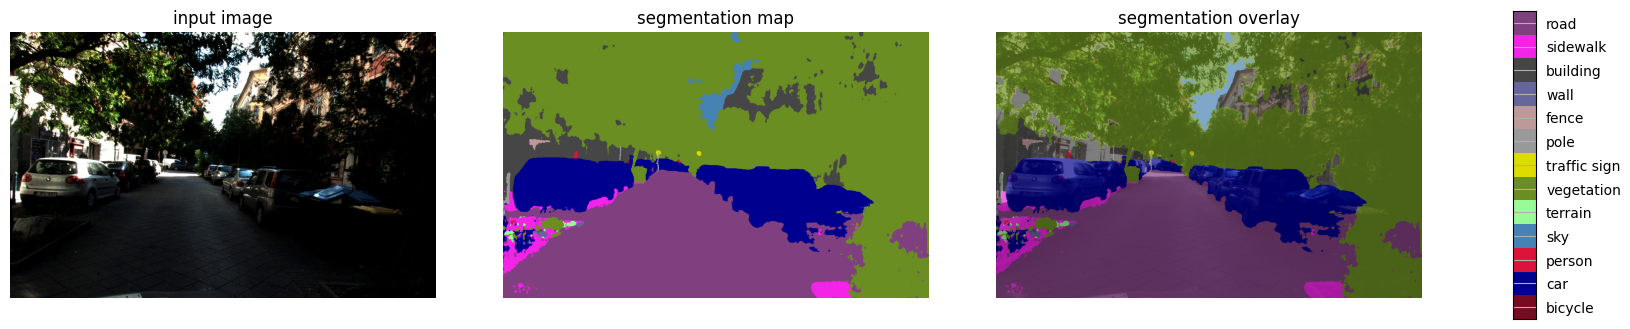

In [13]:
SAMPLE_IMAGE = 'Drive-Scene-Images/Dev1_Image_w1920_h1200_fn2636.jpg'

def run_visualization(SAMPLE_IMAGE):
    """Inferences DeepLab model and visualizes result."""
    original_im = Image.open(SAMPLE_IMAGE)
    seg_map = MODEL.run(original_im)
    vis_segmentation(original_im, seg_map)

run_visualization(SAMPLE_IMAGE)

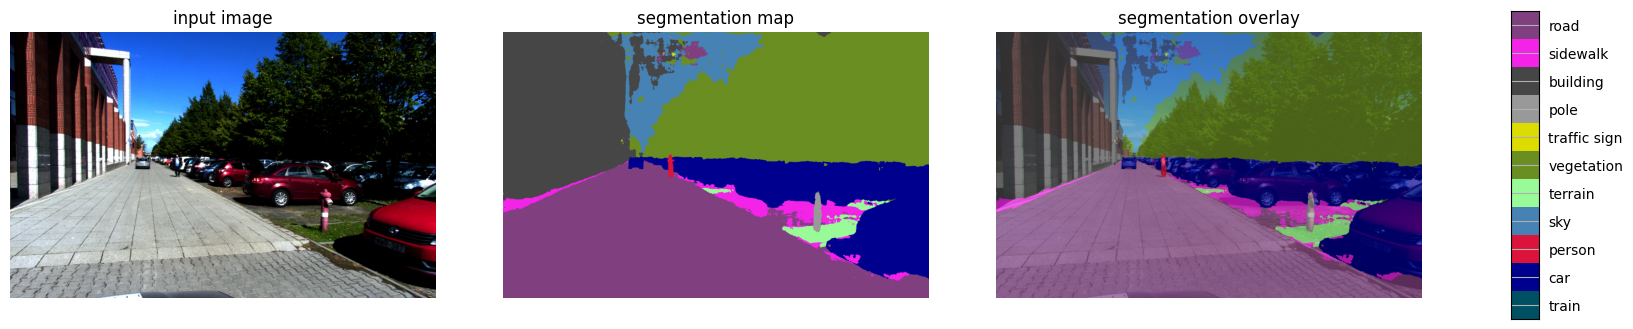

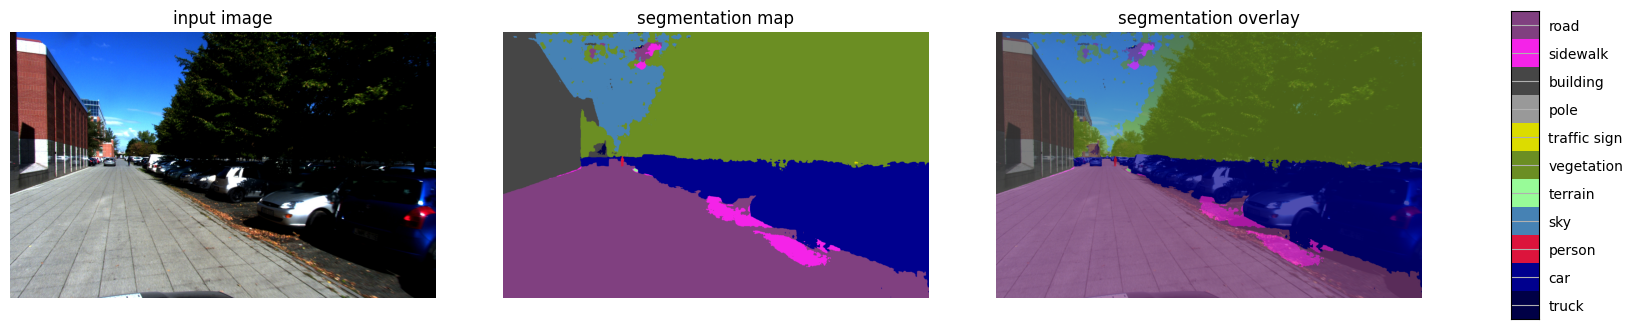

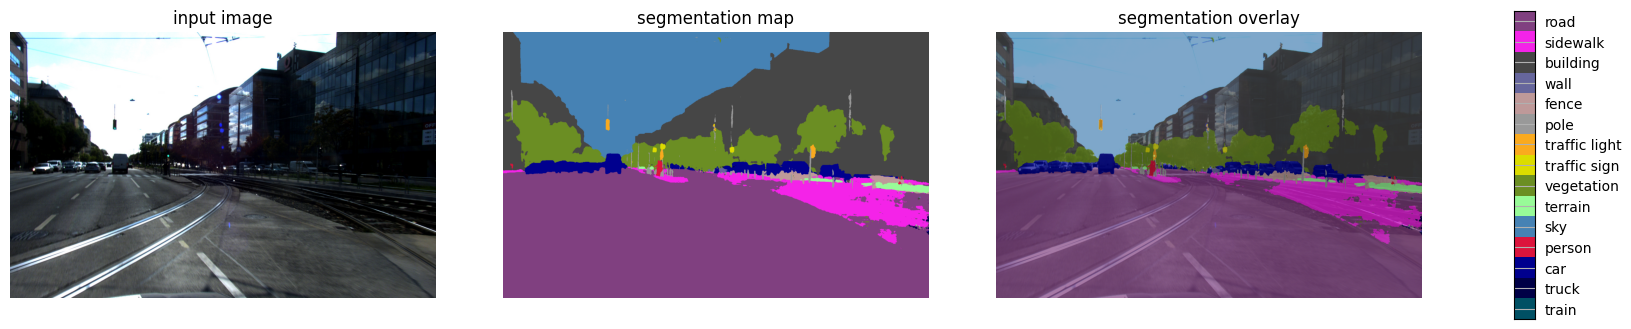

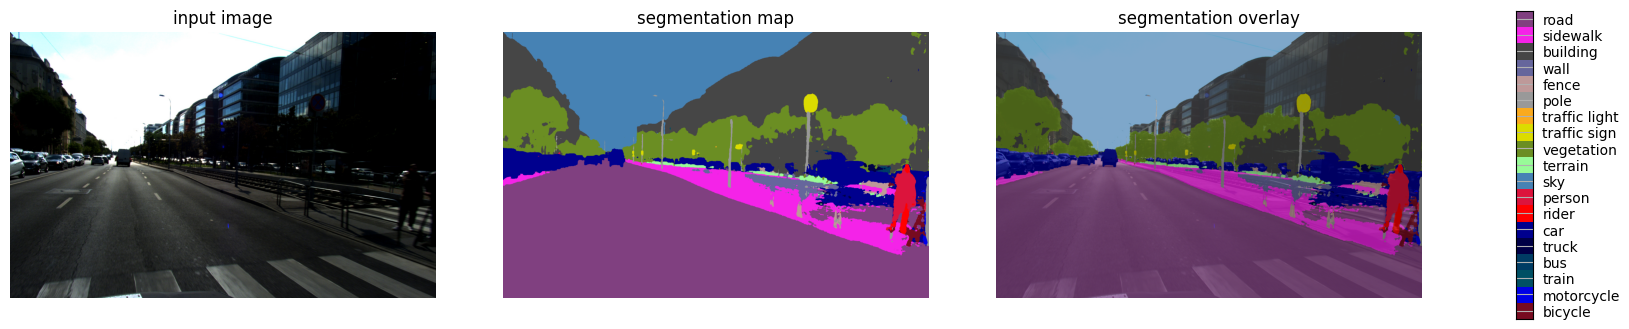

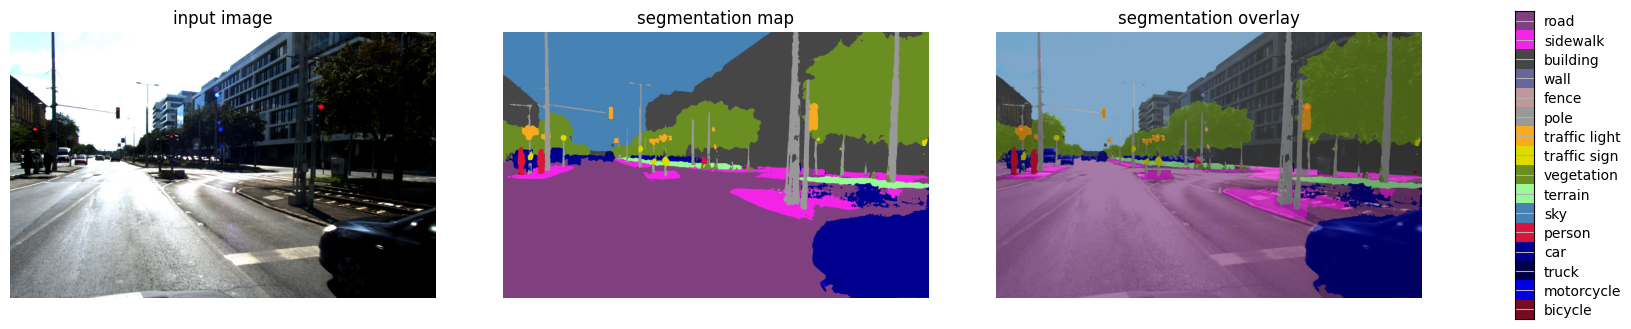

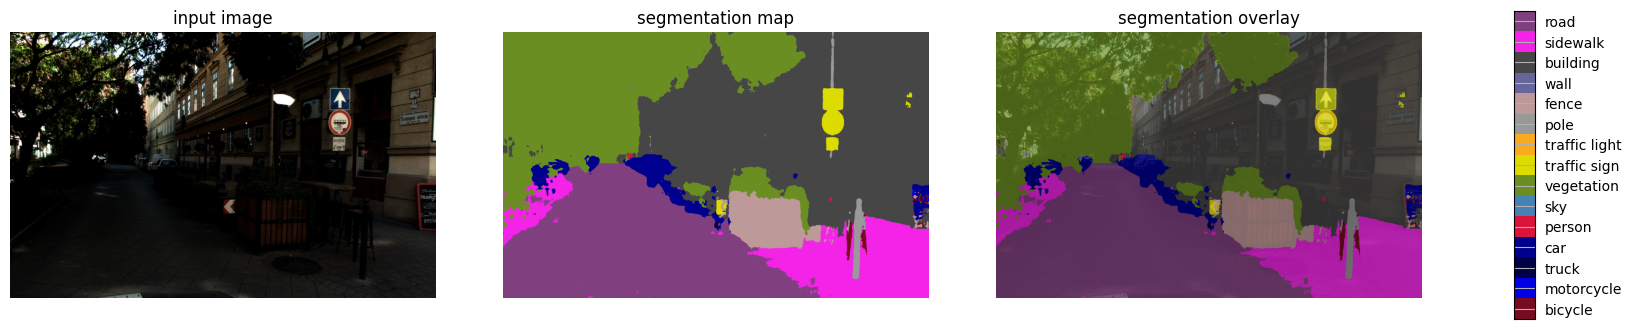

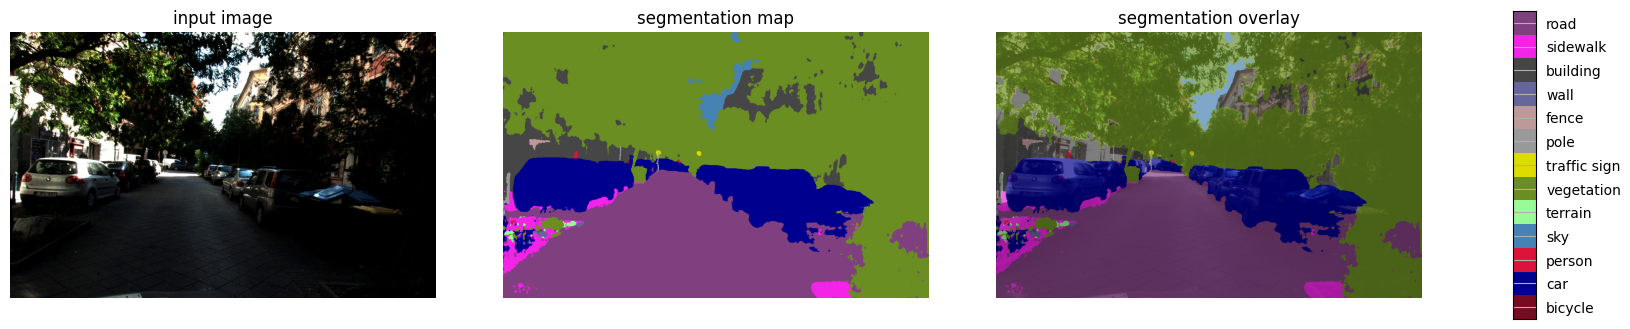

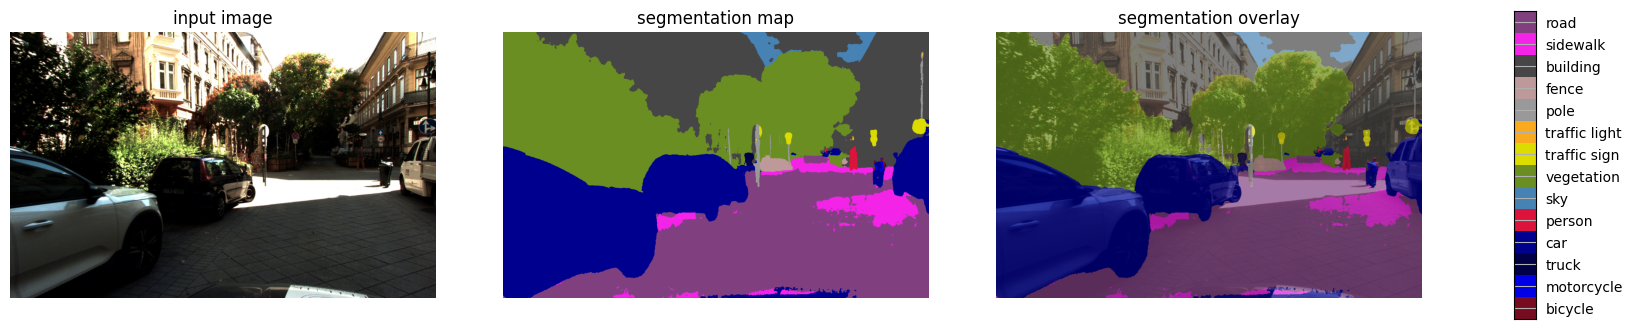

In [14]:
for x in images:
    run_visualization('Drive-Scene-images/'+x)